In [1]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 563.7 kB/s eta 0:00:24
   ---------------------------------------- 0.1/13.3 MB 655.4 kB/s eta 0:00:21
   ---------------------------------------- 0.1/13.3 MB 467.6 kB/s eta 0:00:29
   ---------------------------------------- 0.1/13.3 MB 514.3 kB/s eta 0:00:26
   ---------------------------------------- 0.2/13.3 MB 459.5 kB/s eta 0:00:29
   ---------------------------------------- 0.2/13.3 MB 459.5 kB/s eta 0:00:29
   ---------------------------------------- 0.2/13.3 MB 459.5 kB/s eta 0:00:29
    --------------------------------------- 0.2/13.3 MB 398.4 kB/s eta 0:00:33
    -------------

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')

In [5]:
df.columns = ['ds', 'y']

# Convert the 'ds' column to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df)


11:46:00 - cmdstanpy - INFO - Chain [1] start processing
11:46:00 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=12, freq='M')

# Predict the future values
forecast = model.predict(future)

C:\Users\ADMIN\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


C:\Users\ADMIN\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


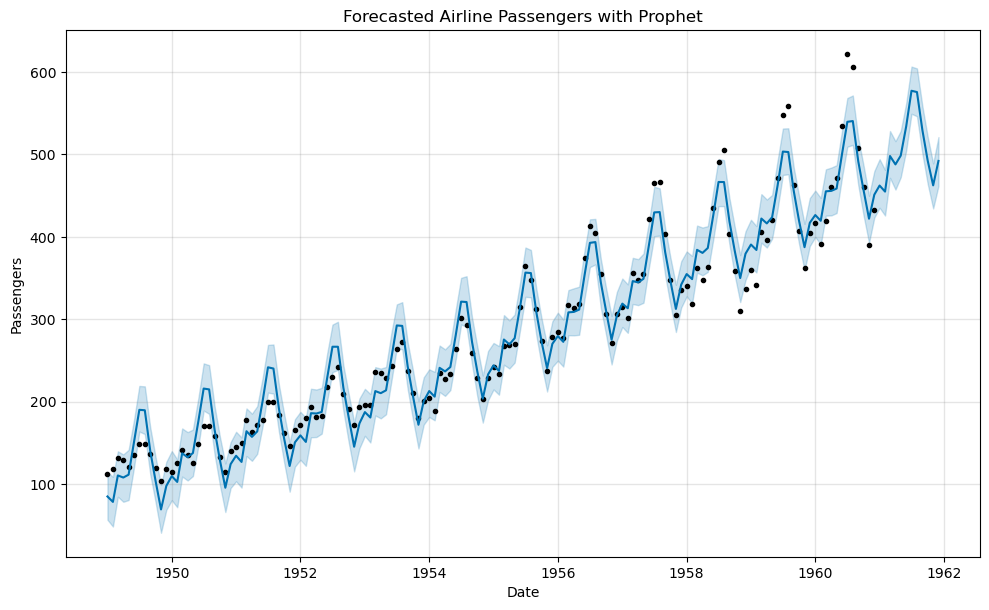

C:\Users\ADMIN\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ADMIN\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ADMIN\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

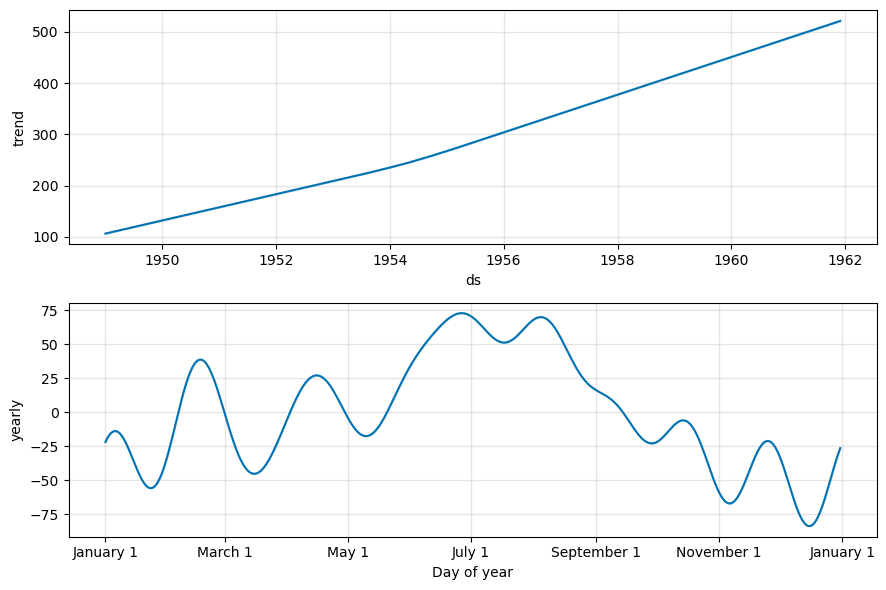

In [9]:
fig = model.plot(forecast)
plt.title('Forecasted Airline Passengers with Prophet')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# Plot forecast components (trend, seasonality)
fig2 = model.plot_components(forecast)
plt.show()